# Topic Modeling and Dimensionality Reduction

This project involves the use of Latent Dirichlet Allocation (LDA) for topic modeling and Uniform Manifold Approximation and Projection (UMAP) for dimensionality reduction.

In [2]:
# Natural Language Processing
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

# Topic Modeling
from gensim import corpora
from gensim.models import LdaModel
from top2vec import Top2Vec

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

# Others
import warnings
from matplotlib import MatplotlibDeprecationWarning
import umap


[nltk_data] Downloading package punkt to /Users/felixtong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/felixtong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
file_path = "/path/to/your/directory/filename"

# latent Dirichlet allocation (LDA)

A value of λ close to 1 ranks terms solely based on their probability within the topic, 
while a value of λ close to 0 ranks terms solely based on their distinctiveness or exclusivity within the topic

**Disadvantages:**

- Assumes that the topics are independent of each other;, hence, only the frequency of the common occurrence of words is used.

In [4]:
# Load the NLTK sent tokenizer
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

# Read the text file
with open(file_path, 'r') as f:
    text = f.read()

# Tokenize the text into sentences
sentences = sent_detector.tokenize(text.strip())

# Create a tokenizer that matches only non-punctuation patterns
tokenizer = RegexpTokenizer(r'\w+')

# Tokenize each sentence into words and filter out punctuation
texts = [tokenizer.tokenize(sentence) for sentence in sentences]

# Create a dictionary from the texts
dictionary = corpora.Dictionary(texts)

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.058947  0.067631       1        1  49.309632
1     -0.108716  0.003917       2        1  35.904280
0      0.049768 -0.071548       3        1  14.786088, topic_info=     Term      Freq     Total Category  logprob  loglift
0      It  2.000000  2.000000  Default  30.0000  30.0000
73     to  2.000000  2.000000  Default  29.0000  29.0000
57    her  2.000000  2.000000  Default  28.0000  28.0000
86   four  0.000000  0.000000  Default  27.0000  27.0000
85  There  0.000000  0.000000  Default  26.0000  26.0000
..    ...       ...       ...      ...      ...      ...
24      a  0.130480  3.210575   Topic3  -4.9771  -1.2915
62   dogs  0.130360  1.845816   Topic3  -4.9780  -0.7389
39     on  0.130262  2.453878   Topic3  -4.9788  -1.0244
12   Paul  0.130218  1.772402   Topic3  -4.9791  -0.6994
11     14  0.130212  1.772408   Topic3  -4.9791  -0.6994

[143 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
13        1  0.612605    1033
13        3  0.612605    1033
17        1  0.806066   10339
11        2  0.564204      14
18        1  0.806074  Alaska
...     ...       ...     ...
48        3  0.613463     was
49        1  0.806060    will
83        2  0.857801    with
76        1  0.806133     yet
84        2  0.857803     you

[98 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [5]:
# Load the NLTK sent tokenizer
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

# Load the NLTK stop words
stop_words = set(stopwords.words('english'))

# Create a tokenizer that matches only non-punctuation patterns
tokenizer = RegexpTokenizer(r'\w+')

# Read the text file
with open('/Users/felixtong/Desktop/usf_msds/ACLU/data/bwc_and_dashcam_video/all_transcript/SKUBOWITZ_0A00303_182834_REDACTED_.v1.txt', 'r') as f:
    text = f.read()

# Tokenize the text into sentences
sentences = sent_detector.tokenize(text.strip())

# Tokenize each sentence into words, filter out punctuation and stop words
texts = [[word for word in tokenizer.tokenize(sentence) if word not in stop_words] for sentence in sentences]

# Create a dictionary from the texts
dictionary = corpora.Dictionary(texts)

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.091882  0.0       1        1  58.063199
0     -0.091882  0.0       2        1  41.936801, topic_info=        Term       Freq      Total Category  logprob  loglift
3          I  10.000000  10.000000  Default  30.0000  30.0000
75      grow   3.000000   3.000000  Default  29.0000  29.0000
61        No   3.000000   3.000000  Default  28.0000  28.0000
33      know   5.000000   5.000000  Default  27.0000  27.0000
36        It   2.000000   2.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
59       put   0.916004   1.880967   Topic2  -4.3063   0.1495
49        Oh   0.891285   1.884573   Topic2  -4.3337   0.1202
42       one   0.888167   1.885027   Topic2  -4.3372   0.1165
39      Adam   0.887891   1.885067   Topic2  -4.3375   0.1161
21  headache   0.886795   1.885226   Topic2  -4.3387   0.1148

[98 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
39        1  0.530485     Adam
39        2  0.530485     Adam
22        1  0.529154       Do
22        2  0.529154       Do
86        2  0.822015    Fruit
...     ...       ...      ...
92        2  0.822832    tight
14        1  1.014478    times
28        1  0.769376    today
38        2  0.822448  vehicle
19        1  0.769218   yellow

[78 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# Top2Vec

- verbose: True - This means the program will provide detailed output.
- entencizer: None - This means no specific sentence splitting method is chosen.
- topic_merge_delta: 0.1 - A smaller number merges more topics, a larger number keeps more topics separate.
- ngram_vocab: False - The program processes words individually.
- embedding_batch_size: 32 - Larger batches are more efficient but smaller ones make the model more robust.
- document_chunker: 'sequential' - Documents are divided into parts one after another.
- chunk_overlap_ratio: 0.5 - Half of each part overlaps with the next one, useful in processing signals or text.
- use_corpus_file: False - The program won’t use a file of text data.
- Speed: Fast-learn, learn, deep-learn

**Disadvantage**:

-  embedding approach might result in too many topics.
- not very suitablelfor small datasets (<1000)
- Each document is assigned to one topic

In [6]:
file_path = "/path/to/your/directory/filename"

### Fine-tuning model

In [7]:
def process_file(file_path):
    documents = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            documents.append(line.strip())
    return documents

def prepare_for_top2vec(file_path):
    documents = process_file(file_path)
    documents = documents[0].split('.')*100
    # FIRST MODEL
    model = Top2Vec(documents, speed="deep-learn", workers=8,
                     embedding_model="distiluse-base-multilingual-cased", 
                     min_count=1, ngram_vocab=True)

    # SECOND MODEL
    # model = Top2Vec(
    # documents,
    # embedding_model="distiluse-base-multilingual-cased",
    # speed="deep-learn",
    # ngram_vocab=True,
    # ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"},)
    
    return model

In [8]:
model1 = prepare_for_top2vec(file_path)

2024-03-25 17:49:54,185 - top2vec - INFO - Pre-processing documents for training
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-03-25 17:49:54,304 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
/opt/homebrew/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
2024-03-25 17:49:57,201 - top2vec - INFO - Creating joint document/word embedding
2024-03-25 17:50:03,639 - top2vec - INFO - Creating lower dimension embedding of documents
2024-03-25 17:50:15,305 - top2vec - INFO - Finding dense areas of documents
2024-03-25 17:50:15,377 - top2vec - INFO - Finding topics


### Get Number of Topics

In [9]:
topic_len = model1.get_num_topics()
print(f'The model detected {topic_len} topics')

The model detected 50 topics


### Get Topic Sizes

In [10]:
topic_sizes, topic_nums = model1.get_topic_sizes()
topic_sizes, topic_nums

(array([1100,  300,  200,  200,  100,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,  100,  100,  100,  100,  100,  100,
         100,  100,  100,  100,  100,  100]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

### Description for the code output below:

**topic_words:**

This is a list of words for each topic. The words are the ones that the model has determined to be most representative or indicative of that particular topic1. They are ordered by their relevance to the topic, with the most relevant words appearing first

**word_scores:**

This is a list of scores for each word in topic_words. The scores represent the semantic similarity of each word to its corresponding topic1. A higher score indicates a stronger association between the word and the topic1.

**topic_nums:**

This is a list of topic numbers. Each number corresponds to a unique topic identified by the model1. The topic numbers can be used to reference the topics when using other methods of the Top2Vec model, such as get_topic_info or get_documents_topics1.

In [11]:
# Filter deprecation warnings
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

topic_words, word_scores, topic_nums = model1.get_topics(topic_len)

topic_words[1]
# word_scores, topic_nums

array(['yeah', 'so', 'no', 'obviously', 'not', 'okay', 'oh', 'on', 'see',
       'do', 'right', 'are', 'is', 'that', 'he', 'have', 'hey', 'it',
       'put', 'chas', 'to', 'll', 'got', 'there', 'can', 'been', 'or',
       'mung', 'thank', 'know', 'at', 're', 'just', 'of', 'way', 'him',
       'miranda', 'the', 'like', 'what', 'get', 'don', 'you', 'in',
       'swear', 'id', 'we', 'much', 'doing', 'sir'], dtype='<U14')

### Word cloud for each topic detected

In [12]:
# for topic in topic_nums:
#     model1.generate_topic_wordcloud(topic)

## Creating UMAP (Uniform Manifold Approximation and Projection)

UMAP is a dimensionality reduction technique that is often used in data visualization¹². It's particularly useful when dealing with high-dimensional data¹.

#### Key Features

- **Dimensionality Reduction**: UMAP reduces high-dimensional data to a low-dimensional plot¹.
- **Preserving Structure**: It captures the similarities between data points, preserving both local and global structure¹.
- **Versatility**: UMAP can be used in various fields, including gene expression analysis².

## How it Works

UMAP uses a user-defined parameter, the number of neighbors, to control how much it focuses on local versus global structure¹. The algorithm then constructs a high-dimensional graph from the data and optimizes a low-dimensional graph to be as structurally similar as possible¹.

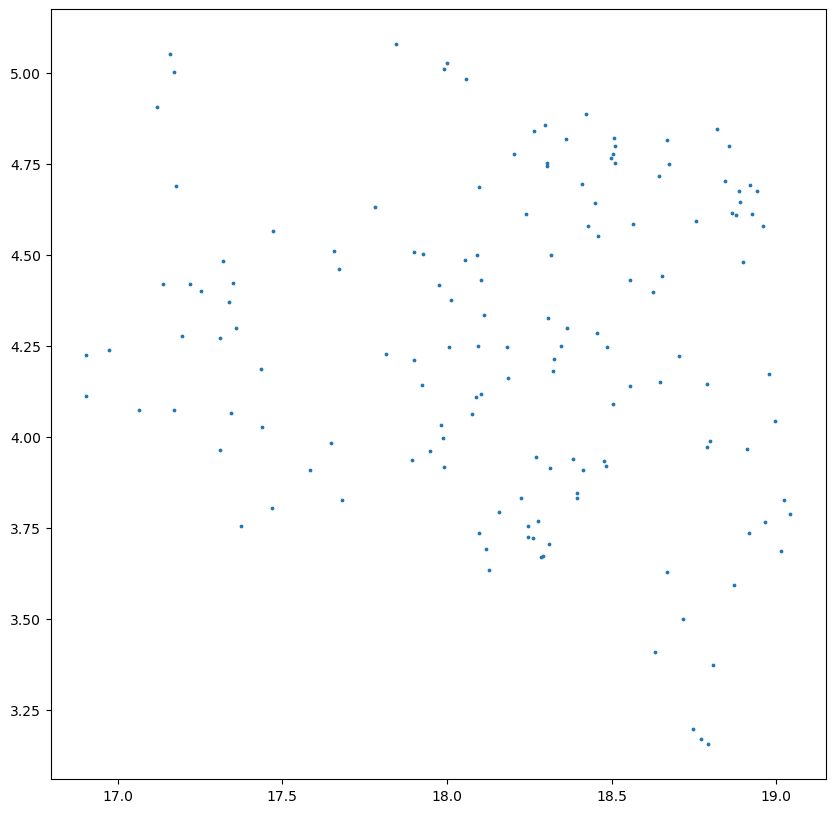

In [13]:
# Get the word embeddings
word_embeddings = model1.word_vectors

# Use UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=20, n_components=5, min_dist=0.0, metric='cosine')
embedding = umap_model.fit_transform(word_embeddings)

# Plot the result
plt.figure(figsize=(10,10))
plt.scatter(embedding[:, 0], embedding[:, 1], s=3)
plt.show()

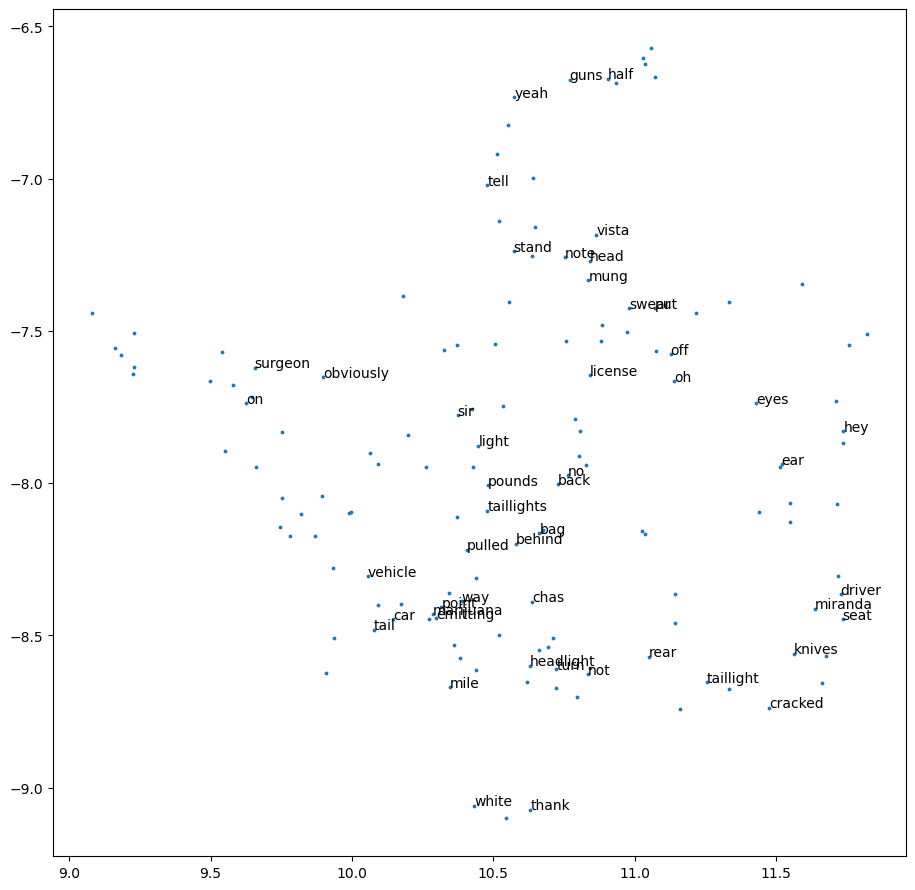

In [14]:
import matplotlib.pyplot as plt

# Get the word embeddings
word_embeddings = model1.word_vectors
words = topic_words[39] # assuming this is how you get the words

# Use UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=20, n_components=5, min_dist=0.0, metric='cosine')
embedding = umap_model.fit_transform(word_embeddings)

# Plot the result
plt.figure(figsize=(11,11))
plt.scatter(embedding[:, 0], embedding[:, 1], s=3)

# Add labels
for i, word in enumerate(words):
    plt.annotate(word, (embedding[i, 0], embedding[i, 1]))

plt.show()